<a href="https://colab.research.google.com/github/IvanIndargo/Datamining_exersice/blob/main/%5BQuestion%5D_Exercise_Week_8_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [2]:
# load dataset and show the first five sample
url = 'https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv'
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# describe data
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Score,0


Text(0, 0.5, 'Spending Score (1-100)')

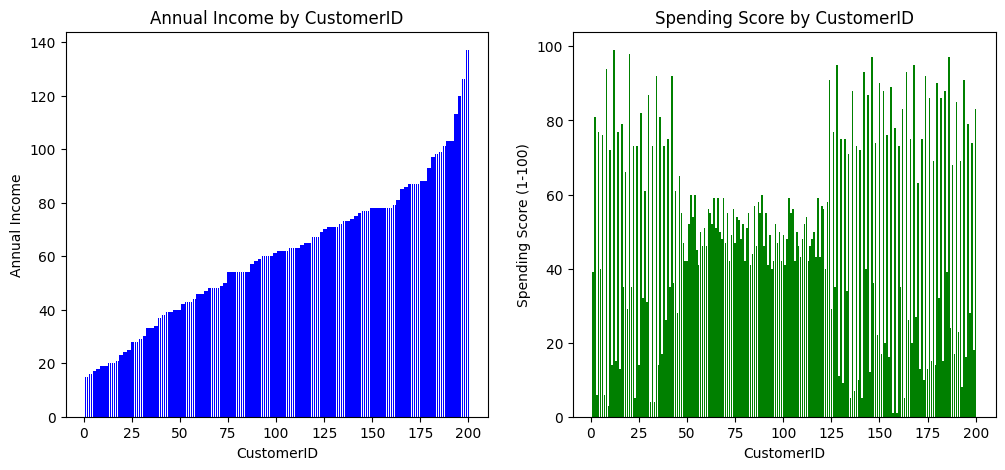

In [6]:
# make an insightful visualization and explain
fig, ax1 = plt.subplots(1, 2, figsize=(12, 5))
ax1[0].bar(df['CustomerID'], df['Annual Income'], color='blue')
ax1[0].set_title('Annual Income by CustomerID')
ax1[0].set_xlabel('CustomerID')
ax1[0].set_ylabel('Annual Income')

ax1[1].bar(df['CustomerID'], df['Spending Score'], color='green')
ax1[1].set_title('Spending Score by CustomerID')
ax1[1].set_xlabel('CustomerID')
ax1[1].set_ylabel('Spending Score (1-100)')
#Chart 1
#Diagram ini menunjukkan Pendapatan Tahunan (Pendapatan Tahunan) dari semua pelanggan, diurutkan dalam urutan naik berdasarkan ID pelanggan.
#Batang berwarna biru menunjukkan peningkatan bertahap pendapatan tahunan pelanggan, yang menunjukkan bahwa nilai pendapatan tahunan meningkat dari pelanggan pertama hingga pelanggan terakhir.

#Chart 2
#Diagram ini menunjukkan Spending Score (Skor Pengeluaran) dari masing-masing pelanggan pada skala 1-100.
#Batang berwarna hijau menunjukkan variasi yang cukup besar dalam skor pengeluaran antara pelanggan, tanpa pola kenaikan atau penurunan yang jelas.
#Spending Score tampak acak, tidak berhubungan langsung dengan urutan CustomerID atau nilai pendapatan di grafik kiri. Beberapa pelanggan dengan pendapatan yang mirip bisa memiliki skor pengeluaran yang berbeda secara drastis.


In [7]:
# make an insightful visualization and explain


## Data Preprocessing

For this case study, we only use income and spending score

In [8]:
# create new dataframe that consist only annual income and spending score
df_income_score = df[['Annual Income', 'Spending Score']]
df_income_score.head()
#code ini bertujuan untuk membuat dataframe baru dengan isi dari dua kolom dari dataset awal yaitu kolom annual income dan kolom spending score

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [9]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_income_score = pd.DataFrame(sc.fit_transform(df_income_score), columns=["Annual Income","Spending Score"])

df_income_score.head()
#Kode ini menstandarisasi kolom "Annual Income" dan "Spending Score" dari dataframe df_income_score, mengubah skala data agar setiap kolom memiliki rata-rata 0 dan standar deviasi 1. Hal ini membuat data lebih siap untuk berbagai analisis statistik atau pembelajaran mesin.

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [10]:
# get stastical information on the new dataset
df_income_score.describe()
#Data ini telah berhasil distandarisasi, terlihat dari rata-rata (mean) mendekati nol dan standar deviasi (std) mendekati satu untuk kedua kolom ("Annual Income" dan "Spending Score"). Kuartil dan nilai min/max menunjukkan variasi data di sekitar pusatnya setelah standarisasi, yang bermanfaat untuk analisis selanjutnya, terutama dalam pembelajaran mesin dan statistik.

,Annual Income,Spending Score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

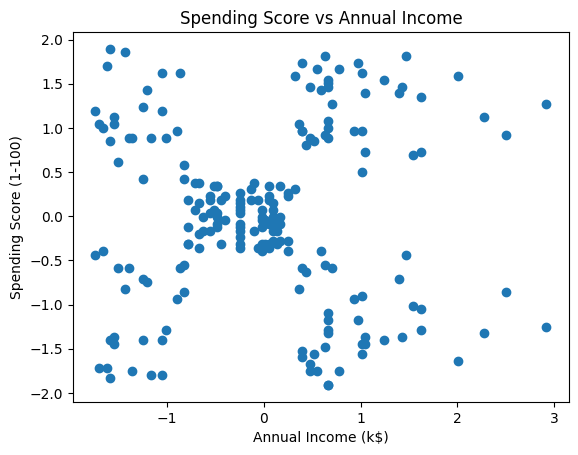

In [11]:
# Visualize the position
plt.scatter(df_income_score['Annual Income'], df_income_score['Spending Score'])
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
#menunjukkan visualisasi dengan menggunakan scatter plot dengan menggunakan kolom annual income dan spending score ketika sudah dilakukan pengubaha skala baru

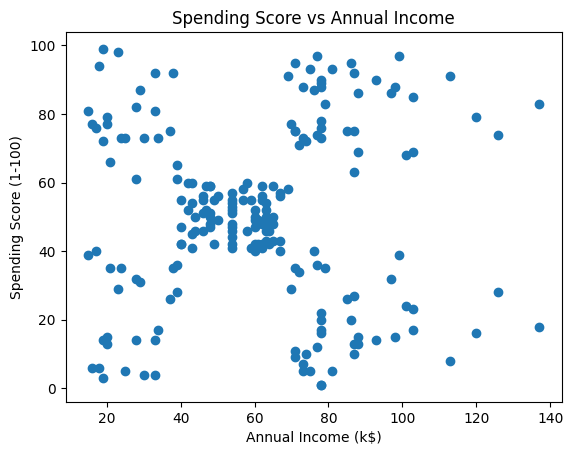

In [12]:
# Visualize the position using the original scale
plt.scatter(df['Annual Income'], df['Spending Score'])
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
#Menunjukkan visualisasi dari kolom annual income dan spending score dengan data asli tanpa dirubah skala datanya

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [13]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_income_score)
    sse.append(kmeans.inertia_)

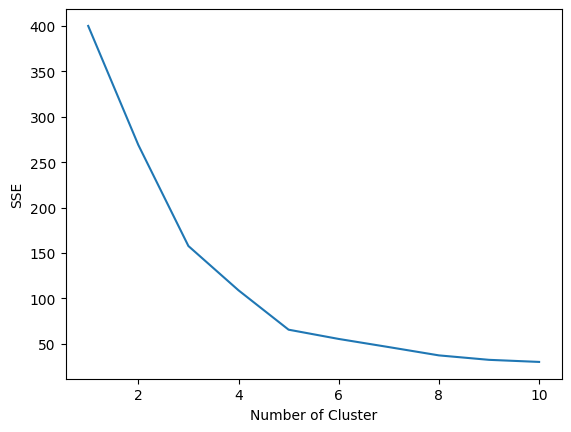

In [14]:
# manually visualize the elbow method using plotlib
plt.plot(range(1,11),sse)
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()
#untuk melihat seberapa baik jumlah cluster yang dapat digunakan dengan melihat visualisasi nya

In [15]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best K for your model is : ", kneedle.elbow)

The best K for your model is :  5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [16]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_income_score)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

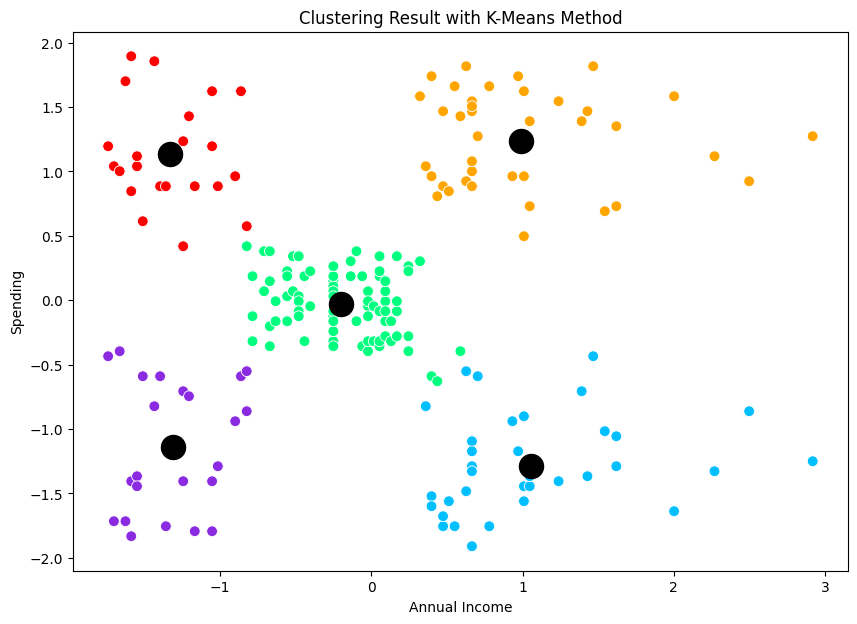

In [17]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Annual Income", y = "Spending Score", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"],
                legend=None, data = df_income_score, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending")
plt.title("Clustering Result with K-Means Method")
plt.show()
#Grafik ini menunjukkan hasil clustering menggunakan metode K-Means pada data pelanggan berdasarkan dua variabel: "Annual Income" (Pendapatan Tahunan) pada sumbu X dan "Spending" (Skor Pengeluaran) pada sumbu Y
#setiap warna menunjukkan cluster yang berbeda, jika satu warna berarti memiliki cluster yang sama

In [18]:
# Inverse transform the scaled data to get the original values
df_income_score = pd.DataFrame(sc.inverse_transform(df_income_score), columns=["Annual Income","Spending Score"])
df_income_score['Cluster'] = y_pred
df_income_score.head()

,Annual Income,Spending Score,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [22]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_income_score.groupby(y_pred).agg({"Spending Score": ["mean", "std", "min", "max"],
                                                              "Annual Income": ["mean", "std", "min", "max"]})
cluster_summary = cluster_summary.rename_axis('cluster')
cluster_summary
#menunjukkan statistik deskriptif untuk masing-masing cluster dari hasil clustering K-Means pada dua variabel: "Spending Score" (Skor Pengeluaran) dan "Annual Income" (Pendapatan Tahunan). Setiap baris menunjukkan statistik untuk satu cluster, dengan statistik meliputi mean (rata-rata), std (standar deviasi), min (nilai minimum), dan max (nilai maksimum) untuk kedua variabel tersebut.
#sebagai contoh Cluster 0:
#Spending Score memiliki Rata-rata sekitar 20.91, menunjukkan skor pengeluaran yang relatif rendah.
#Standar deviasi cukup tinggi (13.01), menunjukkan adanya variasi pengeluaran di dalam kelompok ini.
#Rentang skor pengeluaran adalah 3 hingga 40.
#Annual Income memiliki Rata-rata pendapatan tahunan sekitar 26.30, yang relatif rendah.
#Rentang pendapatan berkisar antara 15 hingga 39.
#Kesimpulan Pelanggan dalam cluster ini memiliki pendapatan dan skor pengeluaran yang rendah.

Spending Score                        Annual Income                   \
                  mean        std   min   max          mean        std   min   
cluster                                                                        
0            20.913043  13.017167   3.0  40.0     26.304348   7.893811  15.0   
1            79.363636  10.504174  61.0  99.0     25.727273   7.566731  15.0   
2            17.114286   9.952154   1.0  39.0     88.200000  16.399067  70.0   
3            82.128205   9.364489  63.0  97.0     86.538462  16.312485  69.0   
4            49.518519   6.530909  34.0  61.0     55.296296   8.988109  39.0   

                
           max  
cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>Dengan melihat summary dari cluster ini perusahaan dapat menyusun strategi yang lebih efektif untuk setiap segmen pelanggan. Klaster 0 dengan pendapatan dan pengeluaran rendah dapat ditargetkan dengan produk yang lebih murah. Klaster 1, meskipun berpendapatan rendah tetapi memiliki pengeluaran tinggi, cocok untuk penawaran eksklusif dan opsi pembayaran fleksibel. Sedangkan Klaster 2 dengan pendapatan tinggi namun pengeluaran rendah dapat diberikan penawaran produk yang bernilai tinggi. Klaster 3, yang memiliki pendapatan dan pengeluaran tinggi, merupakan target yang tepat untuk produk premium dan program keanggotaan VIP. Sementara itu, Klaster 4 dengan pendapatan dan pengeluaran sedang dapat ditargetkan dengan produk bernilai baik dan promosi musiman.